In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import csv

In [2]:
train_data = pd.read_csv("traning_only_labels.csv", header=0,delim_whitespace=False)

C:\Users\vinuk\AppData\Local\Temp\ipykernel_20824\2156468347.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv("traning_only_labels.csv", header=0,delim_whitespace=False)


In [3]:
count = 0
with open("traning_only_labels.csv", 'r') as file:
    reader = csv.reader(file)
    header = next(reader)  # Skip the header line
    for row in reader:
        labels = list(map(int, row[1:]))  # Convert all label columns to integers
        if sum(labels) > 1:
            print(row[0]," : ", row[1:])
            count += 1
        else:
            # print("None of these diseases have only one label in the same row for image:", row[0])
            continue

print("Total number of images with two or more diseases: ", count)

00023313_002.png  :  ['0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0']
00023313_004.png  :  ['1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
00023313_006.png  :  ['0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0']
00023313_008.png  :  ['0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
00023313_010.png  :  ['0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0']
00027736_000.png  :  ['1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
00005794_010.png  :  ['1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0']
00005644_000.png  :  ['0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0']
00012413_000.png  :  ['0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0']
00012413_002.png  :  ['1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0']
00012413_009.png  :  ['0', '0'

In [4]:
train_data = train_data.iloc[:, 1:]

In [5]:
train_data.shape

(78468, 15)

In [6]:
# # # Define the class names
# CLASS_NAMES = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia',
#                'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia','None_Of_These_Diseases']

# # # Assign the class names as column headers
# train_data.columns = CLASS_NAMES

In [7]:
train_data.head()

,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,None_Of_these_diseases
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
class_distribution = train_data.sum()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 Atelectasis                7996
Cardiomegaly               1950
Effusion                   9261
Infiltration              13914
Mass                       3988
Nodule                     4375
Pneumonia                   978
Pneumothorax               3705
Consolidation              3263
Edema                      1690
Emphysema                  1799
Fibrosis                   1158
Pleural_Thickening         2279
Hernia                      144
None_Of_these_diseases    42405
dtype: int64


In [9]:
class_distribution_dict = class_distribution.to_dict()

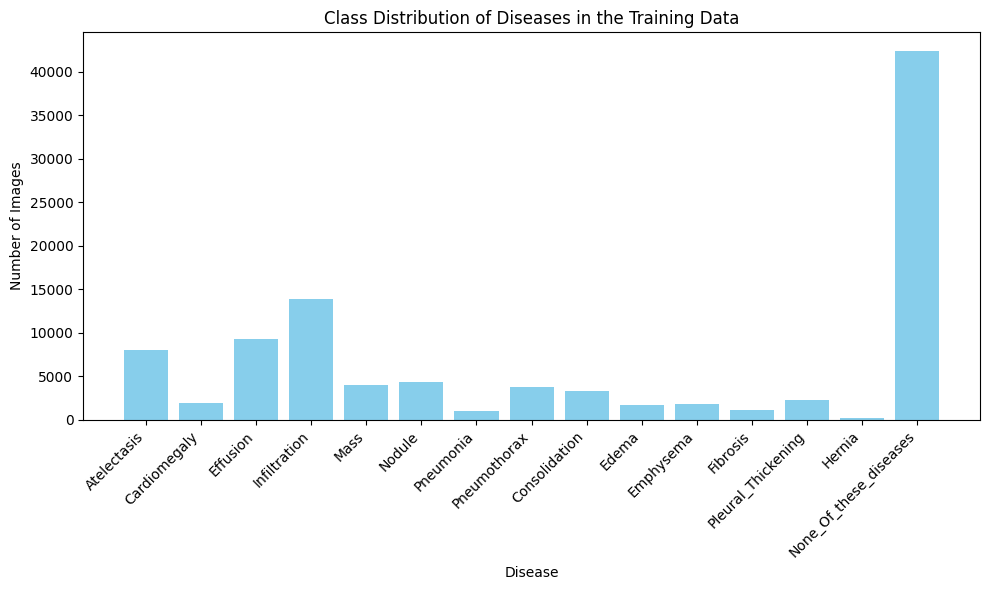

In [10]:
# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_distribution_dict.keys(), class_distribution_dict.values(), color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Diseases in the Training Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
# total_samples = sum(class_distribution_dict.values())
total_samples = train_data.shape[0]
print("Total number of samples: ", total_samples)
class_weights = {cls: total_samples / (len(class_distribution_dict) * freq) for cls, freq in class_distribution_dict.items()}

print(total_samples)
print("Class Weights:\n", class_weights)

# Convert weights to a tensor (order should match your class labels)
class_weights = torch.tensor(list(class_weights.values()), dtype=torch.float)

Total number of samples:  78468
78468
Class Weights:
 {'Atelectasis': 0.6542271135567784, 'Cardiomegaly': 2.6826666666666665, 'Effusion': 0.5648634056797323, 'Infiltration': 0.37596665229265486, 'Mass': 1.3117352056168505, 'Nodule': 1.1957028571428572, 'Pneumonia': 5.348875255623722, 'Pneumothorax': 1.4119298245614036, 'Consolidation': 1.603187250996016, 'Edema': 3.0953846153846154, 'Emphysema': 2.9078376876042245, 'Fibrosis': 4.517443868739205, 'Pleural_Thickening': 2.2953927161035543, 'Hernia': 36.327777777777776, 'None_Of_these_diseases': 0.12336281098927013}


In [12]:
# import torch.nn as nn

# # Initialize the loss function with class weights
# criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights)

# # Example training loop
# model = DenseNet121(out_size=14)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# for epoch in range(num_epochs):
#     model.train()
#     for inputs, targets in train_loader:
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, targets)
#         loss.backward()
#         optimizer.step()